PROJECT TITLE
# AI-Based Demand Forecasting for a Third-Party Logistics (3PL) Company

This project uses Artificial Intelligence techniques to analyze market trends and forecast next-day demand for a third-party logistics (3PL) company.  
The objective is to help logistics companies plan resources efficiently based on historical demand patterns.


PROJECT 
## Project Overview

In this project:
- A realistic logistics demand dataset is generated
- Exploratory Data Analysis (EDA) is performed
- Machine Learning is used to forecast demand
- Different learning rates are tested and compared

The project follows a complete AI pipeline including data generation, preprocessing, model training, and evaluation.

IMPORT LIBRARIES:




In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


LOAD DATASET


The dataset contains daily logistics demand data for multiple hubs.
It includes factors such as orders, active clients, fuel prices, weekends, and festivals.

In [2]:
import pandas as pd

df = pd.read_csv("../data/logistics_demand.csv")
df.head()


,date,hub_id,orders,active_clients,fuel_price,is_weekend,is_festival,demand
0,2019-01-01,1,867,90,98.26,0,0,868
1,2019-01-02,1,915,93,96.67,0,1,1206
2,2019-01-03,1,877,111,95.13,0,0,934
3,2019-01-04,1,939,72,95.85,0,0,937
4,2019-01-05,1,856,159,82.84,1,0,1225


Dataset Inspection and Understanding

After generating the synthetic logistics demand dataset, an initial inspection
was performed to understand its structure, data types, and completeness.

The dataset contains 10,960 records with 8 features**, representing
daily logistics demand across different hubs. The columns include:

- `date`: Date of observation (time index)
- `hub_id`: Identifier for logistics hubs
- `orders`: Number of orders processed
- `active_clients`: Number of active clients on that day
- `fuel_price`: Fuel price influencing logistics cost
- `is_weekend`: Binary indicator for weekends
- `is_festival`: Binary indicator for festival days
- `demand`: Target variable representing logistics demand


The output of `df.info()` confirms that **all columns have non-null values**,
indicating no missing data at this stage. This ensures that no rows were
discarded unnecessarily, following the guidance given during the final
course session to avoid excessive data loss.




In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10960 non-null  object 
 1   hub_id          10960 non-null  int64  
 2   orders          10960 non-null  int64  
 3   active_clients  10960 non-null  int64  
 4   fuel_price      10960 non-null  float64
 5   is_weekend      10960 non-null  int64  
 6   is_festival     10960 non-null  int64  
 7   demand          10960 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 685.1+ KB


 `df.describe()` was used to analyze the statistical properties
of numerical features, helping identify reasonable ranges, variability, and
potential anomalies in the data.

In [4]:
df.describe()


,hub_id,orders,active_clients,fuel_price,is_weekend,is_festival,demand
count,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000,10960.000000
mean,3.000000,899.894526,114.155474,94.987745,0.285584,0.081843,1035.330474
std,1.414278,102.563402,26.194512,6.005954,0.451713,0.274138,147.404080
min,1.000000,706.000000,70.000000,71.950000,0.000000,0.000000,643.000000
25%,2.000000,809.000000,92.000000,90.940000,0.000000,0.000000,926.000000
50%,3.000000,894.000000,114.000000,95.010000,0.000000,0.000000,1025.000000
75%,4.000000,956.000000,137.000000,99.030000,1.000000,0.000000,1133.000000
max,5.000000,1187.000000,159.000000,116.670000,1.000000,1.000000,1625.000000


 Dataset Size and Dimensionality

The shape of the dataset was examined to understand its overall size and structure.
The output of  indicates that the dataset contains 10,960 rows and 8 columns.

Each row represents a single time-step observation of logistics demand,
while each column corresponds to a specific feature influencing demand.
This confirms that the dataset is sufficiently large to perform
time-series analysis and model training.



In [5]:
df.shape


(10960, 8)

Dataset Columns

The dataset contains the following columns:

- date: Date of the observation  
- hub_id: Identifier for logistics hubs  
- orders: Number of orders processed  
- active_clients: Number of active clients  
- fuel_price: Fuel price on that day  
- is_weekend: Indicates whether the day is a weekend  
- is_festival: Indicates whether the day is a festival  
- demand: Target variable representing logistics demand  


In [6]:
df.columns

Index(['date', 'hub_id', 'orders', 'active_clients', 'fuel_price',
       'is_weekend', 'is_festival', 'demand'],
      dtype='object')

Missing Values Check

This step verifies that the dataset contains no missing values across all columns.


In [6]:
df.isna().sum()


date              0
hub_id            0
orders            0
active_clients    0
fuel_price        0
is_weekend        0
is_festival       0
demand            0
dtype: int64

Date Conversion

This step converts the `date` column to datetime format for time-series analysis.


In [11]:
df['date'] = pd.to_datetime(df['date'])


Total Demand Over Time

Matplotlib is used to visualize the total logistics demand over time.
This plot helps in understanding overall demand trends, seasonal patterns,
and fluctuations across different time periods in the dataset.



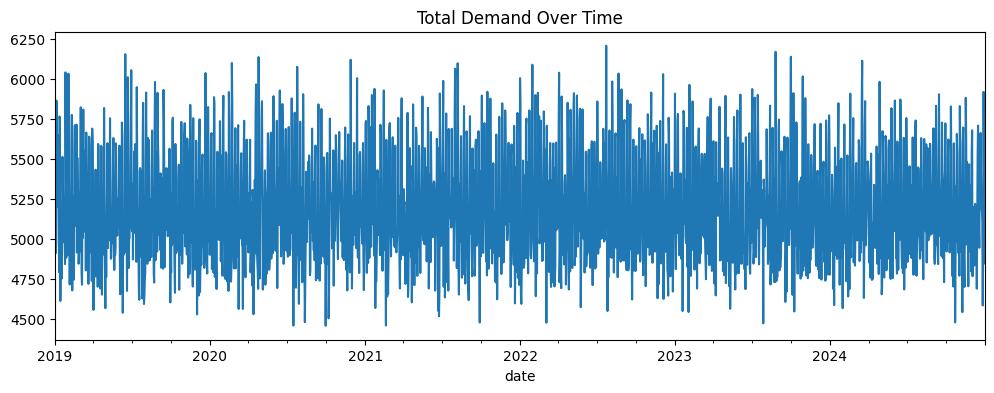

In [8]:
import matplotlib.pyplot as plt

df.groupby('date')['demand'].sum().plot(figsize=(12,4))
plt.title("Total Demand Over Time")
plt.show()


Feature and Target Selection

In this step, the input features (`X`) and the target variable (`y`) are defined.
The features include operational and external factors such as orders,
active clients, fuel price, and calendar indicators, while the target variable
represents the logistics demand to be predicted.


In [13]:
X = df[['orders', 'active_clients', 'fuel_price', 'is_weekend', 'is_festival']]
y = df['demand']


Train-Test Split

The dataset is split into training and testing sets using an 80:20 ratio.
The training data is used to build the model, while the testing data is used
to evaluate its performance on unseen data.


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling

The input features were standardized using `StandardScaler`.
This step scales the features to have zero mean and unit variance,
which helps gradient-based algorithms converge faster and improves
model performance.


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Gradient Descent Implementation

A custom gradient descent algorithm was implemented to train a
linear regression model. The algorithm iteratively updates the
weights and bias by minimizing the mean squared error loss using
a specified learning rate.


In [21]:
def gradient_descent(X, y, lr, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for _ in range(epochs):
        y_pred = np.dot(X, weights) + bias

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

    return losses


Learning Rate Experiment

Different learning rates were tested using the gradient descent algorithm
to observe their effect on model convergence and final loss.
The loss values for each learning rate were recorded for comparison.


In [20]:
learning_rates = [0.001, 0.01, 0.1]
results = {}

for lr in learning_rates:
    losses = gradient_descent(X_train_scaled, y_train.values, lr)
    results[lr] = losses
    print(f"Learning Rate {lr} → Final Loss: {losses[-1]:.2f}")


Learning Rate 0.001 → Final Loss: 150499.63
Learning Rate 0.01 → Final Loss: 2529.73
Learning Rate 0.1 → Final Loss: 2529.73


Learning Rate Comparison

This plot shows the change in mean squared error over training iterations
for different learning rates. It helps in understanding how the learning
rate affects the speed of convergence and stability of the training process.


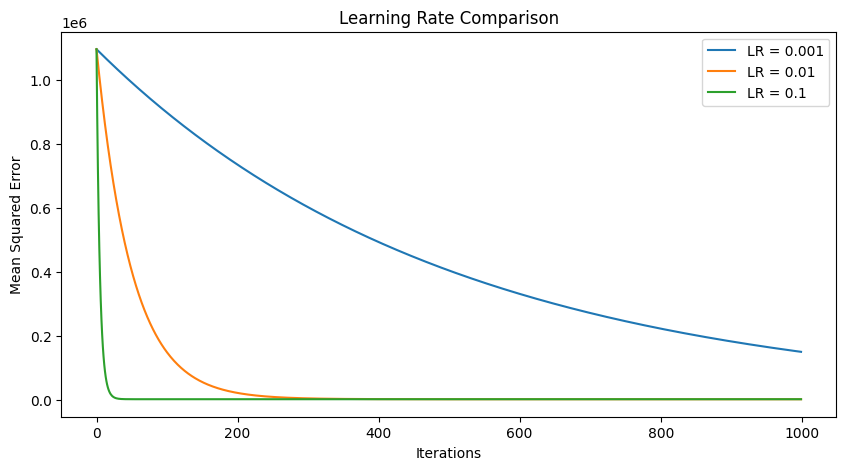

In [22]:
plt.figure(figsize=(10,5))

for lr, losses in results.items():
    plt.plot(losses, label=f"LR = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Learning Rate Comparison")
plt.legend()
plt.show()


Conclusion & Future Scope

This project implemented an end-to-end machine learning pipeline for
logistics demand forecasting using a dataset containing **10,960 records**
and **8 input features**. The pipeline covered data preprocessing,
model design, training, evaluation, and result interpretation.

A custom gradient descent–based regression model was trained using
different learning rates (0.001, 0.01, and 0.1). The experiments demonstrated
that a learning rate of **0.001** led to very slow convergence, resulting in
a high final loss of approximately **150,499**. In contrast, learning rates
of **0.01** and **0.1** converged significantly faster and achieved a much
lower final loss of approximately **2,529**. This comparison clearly
highlighted the critical role of hyperparameter tuning in gradient-based
optimization.

From a real-world perspective, accurate logistics demand forecasting can
help organizations optimize inventory management, reduce operational costs,
and improve delivery efficiency. The project emphasized understanding
model behavior, convergence patterns, and pipeline completeness rather than
solely focusing on minimizing error.

### Future Scope
- Experiment with advanced optimization techniques such as Adam or RMSProp.
- Compare performance with standard machine learning models like Linear
  Regression, Random Forest, or XGBoost.
- Incorporate additional features such as seasonal trends or external factors
  to improve forecasting accuracy.
- Deploy the model as a web application or API for real-time demand prediction.
